# Calculating $k_{A,R}$ for 1b

The kinetic data for the unsubstituted reactant was not reported in the 2006 paper but is presented in work from 2002. The experiment was also reported at a different temperature (293K) so we will have to recalulate all the rates for 313K. 

The data was found in the supplemental material for...

"The First Kinetic Evidence for Acid Catalysis in a Monocyclic Rearrangement of Heterocycles:  Conversion of the Z-Phenylhydrazone of 5-Amino-3-benzoyl-1,2,4-oxadiazole into N,5-Diphenyl-2H-1,2,3-triazol-4-ylurea." B. Cosimelli, V. Frenna, S. Guernelli, C.Z. Lanza, G. Macaluso, G. Petrillo, D. Spinelli, J. Org. Chem., 2002, 67, 8010-8018. https://doi.org/10.1021/jo026039z

The data was entered into a csv file titled "1b-data_thermo.csv"

We will calulate the rates using the Erying equation

$$k = \frac{\kappa k_B T}{h}e^{\frac{\Delta S^{\ddagger}}{R}}e^{\frac{-\Delta H^{\ddagger}}{RT}}$$

Then we will export the columns of $pS^+$ and $k_{(A,R)}\times 10^5$ to a csv file named "1b-data_calc.csv"

This file will be edited and annotated using a text editor and saved as "1b-data.csv"

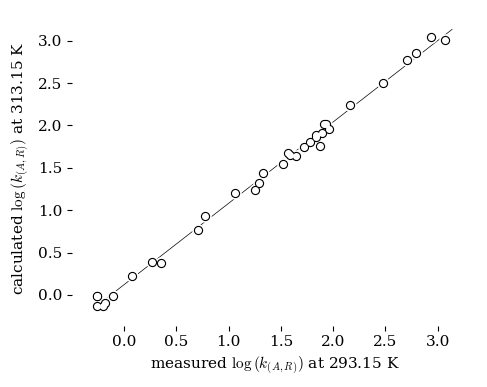

The slope of the log-log plot is 0.960
Therefore the calculated rates are (on average) 9.13 times faster


,delta_H,delta_S,"k(A,R)x10^5_measured",BUFFER,"k(A,R)x10^5_Erying"
pS+,,,,,
0.10,86,-29,10.1000,HCl,89.658114
0.18,85,-31,9.4400,HCl,103.502213
0.25,85,-31,8.9100,HCl,103.502213
0.29,85,-33,8.5100,HCl,81.373387
0.33,85,-36,8.1700,HCl,56.725918
0.40,85,-34,7.5000,HCl,72.152067
0.49,85,-35,6.6500,HCl,63.975716
0.58,86,-33,5.7900,HCl,55.418545
0.71,86,-35,4.8500,HCl,43.570032


In [25]:
##############################################################
### Set up libraries and global variables
##############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.constants as constants  # a collection of scientific constants

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_23/data/"
#github_location = "./data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

datafile_name = "1b-data_thermo.csv"

##############################################################
### Read data for thermodynamic parameters
##############################################################

df = pd.read_csv(github_location + datafile_name, 
             delimiter = ",", 
             skipinitialspace=True, 
             index_col="pS+", 
             comment = "#") 

##############################################################
### calculate rate constants using Eyring equation
##############################################################

### Set up constants
T = 313.1
kappa = 1
kB = constants.Boltzmann
h = constants.h
R = constants.R
delta_H = df["delta_H"]*1000
delta_S = df["delta_S"]

### rename the result column in the data set to indicate that it is the measured data from the paper
df.rename(columns={"k(A,R)x10^5":"k(A,R)x10^5_measured"}, inplace = True)

### Calculate the rate constants using the Eyring equation
df["k(A,R)x10^5_Erying"] = (kappa * kB * T / h) * np.exp(delta_S / R) * np.exp(-delta_H / (R * T)) * 1E5

### Pull x and y data from the dataframe
x = np.log10(df["k(A,R)x10^5_measured"] * 9.13)
y = np.log10(df["k(A,R)x10^5_Erying"])

##############################################################
### Perform a linear regression line fit of x and y
##############################################################

fit = stats.linregress(x,y)    ### This is the line fit

slope = fit.slope
intercept = fit.intercept

### Create a line to plot from the slope and intercept
start = np.min(x)
finish = np.max(x)
x1 = np.arange(start, finish + 0.1, 0.1)
fity = slope*x1 + intercept

##############################################################
### Output plot and results
##############################################################

### Set plot style
style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

### Set figure layout (fig) that contains the plot (ax)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

### Set margins around the plot (ax)
ax.margins(x=.07, y=.07, tight=True)

### Set axis labels and ranges for the plot (ax)
ax.set(
#    title="None",
          ylabel=r"calculated $\log{(k_{(A,R)})}$ at 313.15 K", 
          xlabel=r"measured $\log{(k_{(A,R)})}$ at 293.15 K", 
#          xlim=[-.9,.9], 
#          ylim=[-3.7,-2.7]
         )

### Plot the line fit. (zorder = 3 will be in front of zorder = 1)
ax.plot(x1, fity, color='black', zorder=1, linewidth=0.5)

### Plot the data as a series of stacked data points to create 
### the appearance of open circles with a white margin
ax.scatter(x,y, s=64, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', zorder=3)
ax.scatter(x,y, s=16, color="white", marker='o', zorder=3)

### Save the figure containing the plot and show the plot in this notebook]
fig.savefig("plot_1b_calc.pdf")   # use this to save the figure in PDF format
plt.show()

### Display the results
print(f"The slope of the log-log plot is {slope:0.3f}")
print(f"Therefore the calculated rates are (on average) {10**slope:0.2f} times faster")

display(df)

## Conversion of rates from 293.15K to 313.15K

I could take the $k_{(A,R)}\times 10^5$ that were calculated at 313K from the thermodynamic parameters and use them in a curve fit of the pH-rate profile. The calculated data is a bit choppy compared to the measured data. The thermodynamic values of $\Delta H^\ddagger$ and $\Delta S^\ddagger$ were reported to only two digits of precision.   

On average across the range of pH values the reaction at 313K is 9.13 $\times$ faster than the reaction at 213K as determined from the slope of the line of calculated vs measured rates.

So for a better plot we will export our adjusted rate data by multiplying the rates at 213K by 9.13 to get the rates at 313K.

In [2]:
##############################################################
### make dataset for substituent = H data at 313K (calculated from 213K data set)
##############################################################

### The factor to multiply rates was determined above
factor = 10**slope

### make a column with the same naming convention as all the other data sets
df["k(A,R)x10^5"] = df["k(A,R)x10^5_measured"] * factor

### Create a new dataframe with only the information needed
df2 = df[['k(A,R)x10^5', 'BUFFER']]

### Write that new dataframe out as a data file
filename = "1b-data2.csv"
df2.to_csv("./data/" + filename, float_format="%0.2f")

display(df2)

,"k(A,R)x10^5",BUFFER
pS+,,
0.10,92.166626,HCl
0.18,86.143857,HCl
0.25,81.307390,HCl
0.29,77.657227,HCl
0.33,74.554588,HCl
0.40,68.440564,HCl
0.49,60.683967,HCl
0.58,52.836116,HCl
0.71,44.258231,HCl


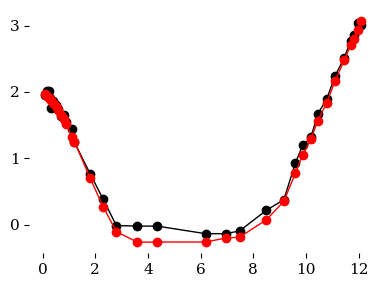

In [20]:
pH = df.index
y_byEyring = np.log10(df["k(A,R)x10^5_Erying"])
y_byfactor = np.log10(df2["k(A,R)x10^5"])

#y_byEyring = df["k(A,R)x10^5_Erying"]
#y_byfactor = df2["k(A,R)x10^5"]


plt.plot(pH,y_byEyring,"o-k")
plt.plot(pH,y_byfactor,"o-r")

In [ ]:
#####################################################
### Get series of data to plot from the dataframe 
#####################################################

x = pH
y = list(df["log_k"])

pH = df.index
x_byEyring = 
x_byfactor = 



##################################################
### Curve Fit                                
##################################################

if LineFitBoolean:

    ### Set bounds so rate consatnts are never negative and constrain Ka value if needed
    min_Ka = 0.01
    max_Ka = 10       # One data set will want infinite Ka value because of no curvature in that region. Limit max value.
    k_min = 0
    k_max = np.inf

    lower_bounds = [min_Ka, k_min, k_min, k_min]    # lower bounds for Ka, kOH, kH2O, kH
    upper_bounds = [max_Ka, k_max, k_max, k_max] # upper bounds for Ka but no upper bounds for kOH, kH2O, kH
    bounds_list = (lower_bounds, upper_bounds)

    ### Perform the curve fit. Will return a list of parameters and an array of statistical info.
    parameters, pcov = curve_fit(model, x, y, bounds = bounds_list)  # Curve fit the model to the x,y data using bounding limits

    [Ka, kOH, kH2O, kH] = parameters  ### Assign the parameter list to values
    perr = np.sqrt(np.diag(pcov))     ### Determine standard deviations from covariance matrix


    ################################################################
    ### make a line from the parameters and the model            
    ### this would be the line of the curve fit when plotted     
    ################################################################

    step = 0.1
    #x1 = np.arange(np.min(x), np.max(x)+step, step)
    x1 = np.arange(-2, 12 + step, step)     # make an array of points to calculate y-values from
    fity = model(x1, Ka, kOH, kH2O, kH)     # Calculate those y-values using the model


##################################################
### Setup a figure and choose a stylesheet     
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

############################
### Set labels and scale 
############################

ax.set(
#    title="pH rate profilr",       
          ylabel=r"$\log{k_{obs}}$", 
          xlabel=r"$pS^+$",                
#          xlim=[-.25,.2],                  
#          ylim=[-6,-1]
         )

#########################################
### Plot the data                     
#########################################


plt.vlines([1,3.8,11.5],-6,-1, colors = "lightgray", linewidth = 0.5)

ax.scatter(x,y, s=64, color="white", zorder=2)
ax.scatter(x,y, s=32, color="black", zorder=2)
ax.scatter(x,y, s=16, color="white", alpha = 1.0, zorder=2)


#########################################
### Plot the line fit.                
#########################################
if LineFitBoolean:
    ax.plot(x1, fity, color='black', zorder=0, linewidth=0.7)

    #######################################################
    ### Print out Parameters and standard deviations    
    #######################################################

    print(f"Ka = {Ka:0.2G} pm {perr[0]:0.2G}")
    print(f"kOH = {kOH:0.3G} pm {perr[1]:0.3G}")
    print(f"kH2O = {kH2O:0.3G} pm {perr[2]:0.3G}")
    print(f"kH = {kH:0.3G} pm {perr[3]:0.3G}")
    print(f"pKa = {-np.log10(Ka):0.2f}")

#############################
### Output the final plot 
#############################

fig.savefig("plot_pH.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots



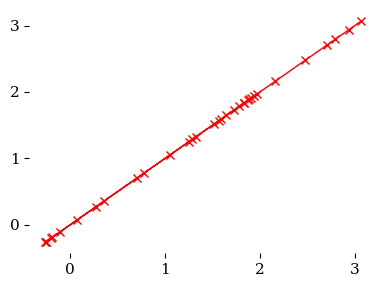

In [14]:
plt.plot(y_byEyring,y_byfactor,"x-r")